In [47]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# pip3 install auto-sklearn
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    median_absolute_error,
    mean_squared_log_error,
    explained_variance_score
)

In [74]:
# 평가 함수 정의
def evaluate_regression(y_true, y_pred, dataset_name="Dataset"):
    print(f"\nEvaluation for {dataset_name}:")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.4f}")
    print(f"Median Absolute Error (MedAE): {median_absolute_error(y_true, y_pred):.4f}")
    try:
        print(f"Mean Squared Log Error (MSLE): {mean_squared_log_error(y_true, y_pred):.4f}")
    except ValueError:
        print("Mean Squared Log Error (MSLE): Not defined for negative values.")
    print(f"Explained Variance Score: {explained_variance_score(y_true, y_pred):.4f}")

In [49]:
file_path = 'concrete.csv'
df = pd.read_csv(file_path)
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [50]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


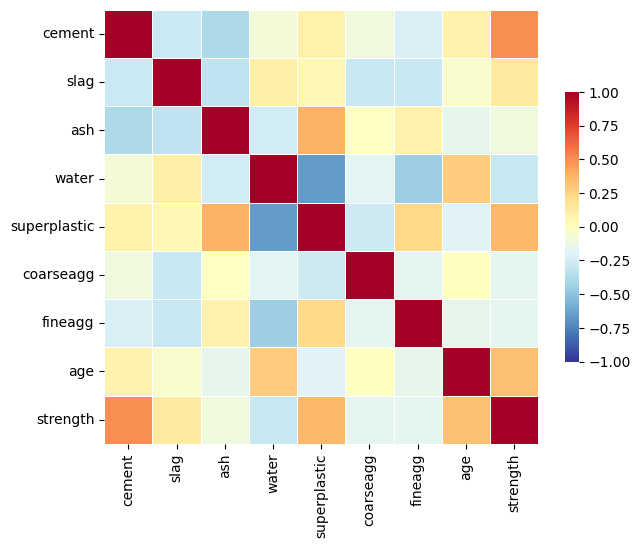

In [51]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(7, 7))

mask = np.zeros_like(corr, dtype=bool)
sns.heatmap(corr, cmap='RdYlBu_r', annot=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, vmin=-1, vmax=1, square=True)
plt.show()

In [55]:
y = df['strength']
X = df.drop(['strength'], axis=1)

model = RandomForestRegressor(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [75]:
evaluate_regression(y_train, y_train_pred, 'train')
evaluate_regression(y_test, y_test_pred, 'test')


Evaluation for train:
R2 Score: 0.9844
Mean Absolute Error (MAE): 1.3042
Root Mean Squared Error (RMSE): 2.0790
Mean Squared Error (MSE): 4.3224
Median Absolute Error (MedAE): 0.8826
Mean Squared Log Error (MSLE): 0.0045
Explained Variance Score: 0.9844

Evaluation for test:
R2 Score: 0.9118
Mean Absolute Error (MAE): 3.2836
Root Mean Squared Error (RMSE): 5.0239
Mean Squared Error (MSE): 25.2400
Median Absolute Error (MedAE): 2.1131
Mean Squared Log Error (MSLE): 0.0227
Explained Variance Score: 0.9121


        Feature  Importance
7           age    0.334893
0        cement    0.309988
3         water    0.097018
4  superplastic    0.085065
1          slag    0.079286
6       fineagg    0.042930
5     coarseagg    0.030560
2           ash    0.020259


/tmp/ipykernel_1011271/101314458.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Importance", x="Feature", data=importance_df, palette="viridis")


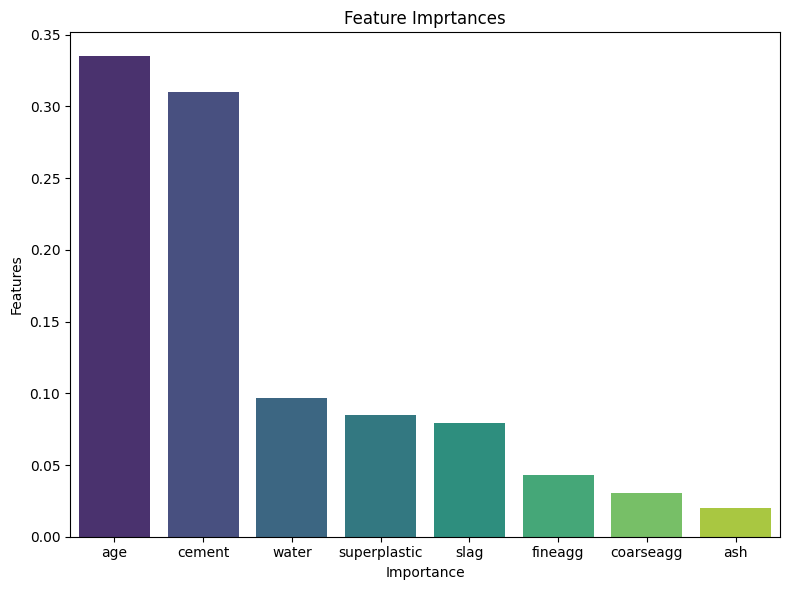

In [73]:
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
})

importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

plt.figure(figsize=(8, 6))
sns.barplot(y="Importance", x="Feature", data=importance_df, palette="viridis")
plt.title("Feature Imprtances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()